

# Project: No Show appointments analysis
## Introduction
### Data description
> This dataset collects information from 100k medical appointments in Brazil and is focused on the question of whether or not patients show up for their appointment. A number of characteristics about the patient are included in each row.
<br />
* ‘ScheduledDay’ tells us on what day the patient set up their appointment.
* ‘Neighborhood’ indicates the location of the hospital.
* ‘Scholarship’ indicates whether or not the patient is enrolled in Brasilian welfare program Bolsa Família.
* Be careful about the encoding of the last column: it says ‘No’ if the patient showed up to their appointment, and ‘Yes’ if they did not show up.

### Questions which will be answered in this project
1. What is the overall percentage of the people showed-up on the appointment?
2. How may the demographics like gender and age affect the percentage of the no-show?
3. Is sending a SMS to each patient as a confirmation and reminder for the appointment date a good solution to reduce the now show percentage ?
4. What are the most factors that effect the patient to show up on time?

### Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


<a id='wrangling'></a>
## Data Wrangling


### General Properties

In [2]:
# Load your data and print out a few lines. Perform operations to inspect data
#   types and look for instances of missing or possibly errant data.
df = pd.read_csv('noshowappointments-kagglev2-may-2016.csv')
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [3]:
def see(data):
    """ Returns the dataframe description and first 5 line """
    print("First 5 rows",data.head())
    print("Shape",data.shape)
    print("Data description",data.describe())
    print("Info",data.info())

In [4]:
see(df)

First 5 rows       PatientId  AppointmentID Gender          ScheduledDay  \
0  2.987250e+13        5642903      F  2016-04-29T18:38:08Z   
1  5.589978e+14        5642503      M  2016-04-29T16:08:27Z   
2  4.262962e+12        5642549      F  2016-04-29T16:19:04Z   
3  8.679512e+11        5642828      F  2016-04-29T17:29:31Z   
4  8.841186e+12        5642494      F  2016-04-29T16:07:23Z   

         AppointmentDay  Age      Neighbourhood  Scholarship  Hipertension  \
0  2016-04-29T00:00:00Z   62    JARDIM DA PENHA            0             1   
1  2016-04-29T00:00:00Z   56    JARDIM DA PENHA            0             0   
2  2016-04-29T00:00:00Z   62      MATA DA PRAIA            0             0   
3  2016-04-29T00:00:00Z    8  PONTAL DE CAMBURI            0             0   
4  2016-04-29T00:00:00Z   56    JARDIM DA PENHA            0             1   

   Diabetes  Alcoholism  Handcap  SMS_received No-show  
0         0           0        0             0      No  
1         0           0  



### Data Cleaning 




#### Checking for duplicated rows in the data


In [5]:
print("Num of duplicated : ", + sum(df['AppointmentID'].duplicated()))

Num of duplicated :  0




#### Removing the non-used columns 

In [6]:
df.drop(['PatientId','AppointmentID','Neighbourhood'], axis=1, inplace=True) # remove unnessory coloumns

In [7]:
see(df)

First 5 rows   Gender          ScheduledDay        AppointmentDay  Age  Scholarship  \
0      F  2016-04-29T18:38:08Z  2016-04-29T00:00:00Z   62            0   
1      M  2016-04-29T16:08:27Z  2016-04-29T00:00:00Z   56            0   
2      F  2016-04-29T16:19:04Z  2016-04-29T00:00:00Z   62            0   
3      F  2016-04-29T17:29:31Z  2016-04-29T00:00:00Z    8            0   
4      F  2016-04-29T16:07:23Z  2016-04-29T00:00:00Z   56            0   

   Hipertension  Diabetes  Alcoholism  Handcap  SMS_received No-show  
0             1         0           0        0             0      No  
1             0         0           0        0             0      No  
2             0         0           0        0             0      No  
3             0         0           0        0             0      No  
4             1         1           0        0             0      No  
Shape (110527, 11)
Data description                  Age    Scholarship   Hipertension       Diabetes  \
count  1105



#### Correcting datatypes and checking the values

In [8]:
# converting some columns datetime type
df['ScheduledDay'] = pd.to_datetime(df['ScheduledDay'])
df['AppointmentDay'] = pd.to_datetime(df['AppointmentDay'])

In [9]:
df['Gender'].unique() # checking if there's wrong genders

array(['F', 'M'], dtype=object)

In [10]:
df['No-show'].unique() # checking if all values are either showed or not showed

array(['No', 'Yes'], dtype=object)

In [11]:
df[df['Age'] <= 0].count()

Gender            3540
ScheduledDay      3540
AppointmentDay    3540
Age               3540
Scholarship       3540
Hipertension      3540
Diabetes          3540
Alcoholism        3540
Handcap           3540
SMS_received      3540
No-show           3540
dtype: int64

#### Replacing the incorrect values

In [12]:
age_mean = df['Age'].mean() # replacing wrong ages by the average
df.loc[df['Age'] <= 0 , 'Age'] = age_mean
age_mean = df['Age'].mean() # replacing wrong ages by the average
df.loc[df['Age'] <= 0 , 'Age'] = age_mean


In [13]:
# correcting header name
df.rename(columns = {'No-show':'No_show'}, inplace = True)
df.head()

,Gender,ScheduledDay,AppointmentDay,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No_show
0,F,2016-04-29 18:38:08+00:00,2016-04-29 00:00:00+00:00,62.0,0,1,0,0,0,0,No
1,M,2016-04-29 16:08:27+00:00,2016-04-29 00:00:00+00:00,56.0,0,0,0,0,0,0,No
2,F,2016-04-29 16:19:04+00:00,2016-04-29 00:00:00+00:00,62.0,0,0,0,0,0,0,No
3,F,2016-04-29 17:29:31+00:00,2016-04-29 00:00:00+00:00,8.0,0,0,0,0,0,0,No
4,F,2016-04-29 16:07:23+00:00,2016-04-29 00:00:00+00:00,56.0,0,1,1,0,0,0,No


In [14]:
see(df) # another look to the numbers after amending the incorrect values

First 5 rows   Gender              ScheduledDay            AppointmentDay   Age  \
0      F 2016-04-29 18:38:08+00:00 2016-04-29 00:00:00+00:00  62.0   
1      M 2016-04-29 16:08:27+00:00 2016-04-29 00:00:00+00:00  56.0   
2      F 2016-04-29 16:19:04+00:00 2016-04-29 00:00:00+00:00  62.0   
3      F 2016-04-29 17:29:31+00:00 2016-04-29 00:00:00+00:00   8.0   
4      F 2016-04-29 16:07:23+00:00 2016-04-29 00:00:00+00:00  56.0   

   Scholarship  Hipertension  Diabetes  Alcoholism  Handcap  SMS_received  \
0            0             1         0           0        0             0   
1            0             0         0           0        0             0   
2            0             0         0           0        0             0   
3            0             0         0           0        0             0   
4            0             1         1           0        0             0   

  No_show  
0      No  
1      No  
2      No  
3      No  
4      No  
Shape (110527, 11)
Data descrip

#### Converting No Show values to One and Zero for easier charts

In [15]:
# Converting Yes & No values into numbers to make histograms
df.No_show[df['No_show'] == 'Yes'] = '1'
df.No_show[df['No_show'] == 'No'] = '0'
df['No_show'] = pd.to_numeric(df['No_show'])

C:\Users\MAGED~1.YOU\AppData\Local\Temp/ipykernel_11232/3193600732.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.No_show[df['No_show'] == 'Yes'] = '1'
C:\Users\MAGED~1.YOU\AppData\Local\Temp/ipykernel_11232/3193600732.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.No_show[df['No_show'] == 'No'] = '0'


In [16]:
df['No_show'].unique()

array([0, 1], dtype=int64)

#### Checking the gap time between the appointment day and the scheduled day

In [17]:
df['gaptime'] = (df['AppointmentDay'] - df['ScheduledDay']).dt.days # difference between appointment date and scheduled date in days


df['gaptime'].describe()

count    110527.000000
mean          9.183702
std          15.254996
min          -7.000000
25%          -1.000000
50%           3.000000
75%          14.000000
max         178.000000
Name: gaptime, dtype: float64

#### New dataframes for easier filtering

In [18]:
showed = df[df['No_show']==0] # creating new dfs for easier filtering and counting
not_showed = df[df['No_show']==1]

In [19]:
see(showed) # exploring the showed dataframe

First 5 rows   Gender              ScheduledDay            AppointmentDay   Age  \
0      F 2016-04-29 18:38:08+00:00 2016-04-29 00:00:00+00:00  62.0   
1      M 2016-04-29 16:08:27+00:00 2016-04-29 00:00:00+00:00  56.0   
2      F 2016-04-29 16:19:04+00:00 2016-04-29 00:00:00+00:00  62.0   
3      F 2016-04-29 17:29:31+00:00 2016-04-29 00:00:00+00:00   8.0   
4      F 2016-04-29 16:07:23+00:00 2016-04-29 00:00:00+00:00  56.0   

   Scholarship  Hipertension  Diabetes  Alcoholism  Handcap  SMS_received  \
0            0             1         0           0        0             0   
1            0             0         0           0        0             0   
2            0             0         0           0        0             0   
3            0             0         0           0        0             0   
4            0             1         1           0        0             0   

   No_show  gaptime  
0        0       -1  
1        0       -1  
2        0       -1  
3        0     

In [20]:
see(not_showed) # exploring the not showed dataframe

First 5 rows    Gender              ScheduledDay            AppointmentDay   Age  \
6       F 2016-04-27 15:05:12+00:00 2016-04-29 00:00:00+00:00  23.0   
7       F 2016-04-27 15:39:58+00:00 2016-04-29 00:00:00+00:00  39.0   
11      M 2016-04-26 08:44:12+00:00 2016-04-29 00:00:00+00:00  29.0   
17      F 2016-04-28 09:28:57+00:00 2016-04-29 00:00:00+00:00  40.0   
20      F 2016-04-27 07:51:14+00:00 2016-04-29 00:00:00+00:00  30.0   

    Scholarship  Hipertension  Diabetes  Alcoholism  Handcap  SMS_received  \
6             0             0         0           0        0             0   
7             0             0         0           0        0             0   
11            0             0         0           0        0             1   
17            1             0         0           0        0             0   
20            0             0         0           0        0             0   

    No_show  gaptime  
6         1        1  
7         1        1  
11        1        2  

<a id='eda'></a>
## Exploratory Data Analysis



### Percentage of the people showed-up on the appointment

All appointments :  110527 
 Number of people showed :  88208 
 and the number of people non-showed :  22319
The percentage of the no show to all appointments :  20.193255946510806 %


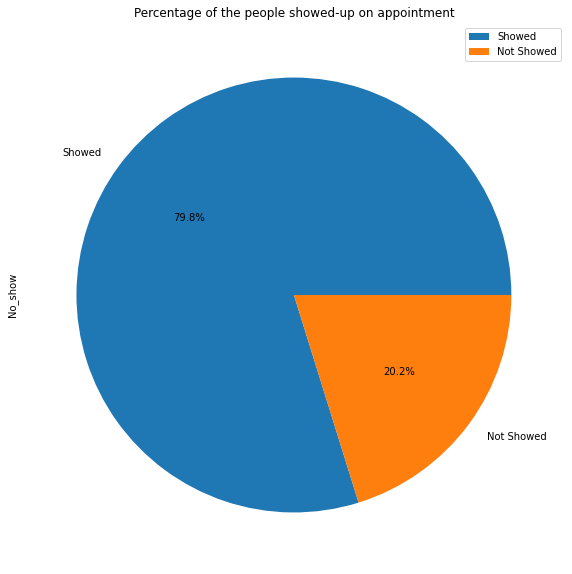

In [21]:
ppl = df['No_show'].count()
ppl_showed = df[df['No_show'] == 0 ].count()['No_show']
ppl_no_show = df[df['No_show'] == 1].count()['No_show']
no_show_perc = (ppl_no_show / ppl)*100

print('All appointments : ',ppl,'\n Number of people showed : ', ppl_showed,'\n and the number of people non-showed : ',ppl_no_show)
print('The percentage of the no show to all appointments : ', no_show_perc,'%')

df['No_show'].value_counts().plot(kind = 'pie',figsize=(22,10), autopct='%1.1f%%', labels = {'Showed','Not Showed'});
plt.title("Percentage of the people showed-up on appointment")
plt.legend()




### Which gender is not showing up in the appointments time the most?

Males that didn't show :  7725 from total male patients :  38687 | percentage of no show :  19.967947889471915 % 
Females that didn't show :  14594 from total female patients :  71840 |percentage of no show :  20.31458797327394 %
Gender
F    14594
M     7725
Name: No_show, dtype: int64


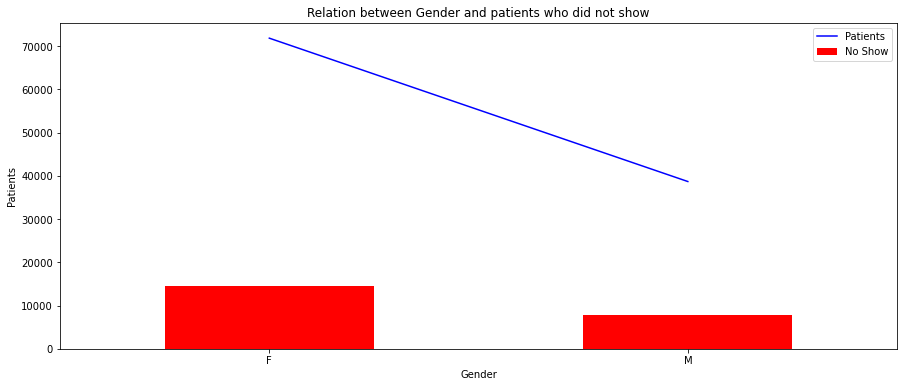

In [22]:
f_no = not_showed[not_showed['Gender'] == 'F'].count()['Gender']
m_no = not_showed[not_showed['Gender'] == 'M'].count()['Gender']
f = df[df['Gender'] == "F"].count()['Gender']
m = df[df['Gender']== "M"].count()['Gender']

print('Males that didn\'t show : ',m_no, 'from total male patients : ',m,'| percentage of no show : ', (m_no/m)*100,"%",
      '\nFemales that didn\'t show : ',f_no, 'from total female patients : ',f, '|percentage of no show : ', (f_no/f)*100,"%")
print(not_showed.groupby('Gender').No_show.count())
not_showed.groupby('Gender').No_show.count().plot(kind='bar',figsize=(15,6), label = "No Show", color = 'red');
df.groupby('Gender').No_show.count().plot(kind='line',figsize=(15,6), label = 'Patients', color = 'blue');
plt.xlabel("Gender")
plt.ylabel("Patients")
plt.title("Relation between Gender and patients who did not show")
plt.legend()

 

### Gap between schedule day and appointment day

gaptime
-7         1
-2         4
-1      1792
 0      1113
 1      1602
        ... 
 154       6
 161       2
 168       1
 175       6
 178       2
Name: No_show, Length: 113, dtype: int64


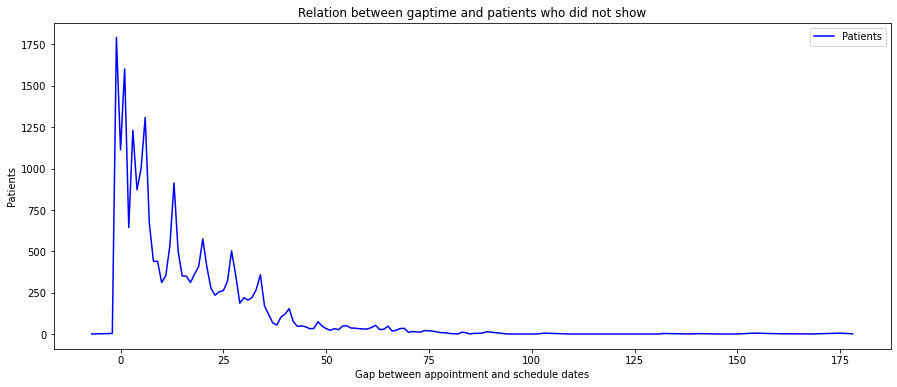

In [23]:
print(not_showed.groupby('gaptime').No_show.count())
not_showed.groupby('gaptime').No_show.count().plot(kind='line',figsize=(15,6), label = 'Patients', color = 'blue');
plt.xlabel("Gap between appointment and schedule dates")
plt.ylabel("Patients")
plt.title("Relation between gaptime and patients who did not show")
plt.legend()



### Age of people who didn't show

In [24]:
print('The average of patients that didn\'t show is ',showed['Age'].mean(),'\nThe Average of patients that didn\'t show is : ',not_showed['Age'].mean())
#Age average for patients

The average of patients that didn't show is  39.00986105668502 
The Average of patients that didn't show is :  35.379532712993374


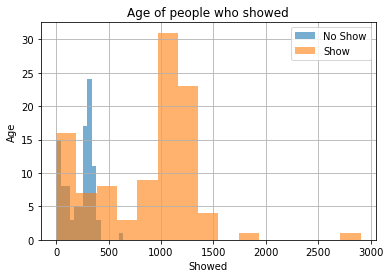

In [25]:

# visualize the average of people who came & who didn't

not_showed.groupby('Age')['No_show'].value_counts().hist(alpha=0.6,bins=15,label='No Show');
showed.groupby('Age')['No_show'].value_counts().hist(alpha=0.6,bins=15,label='Show');
plt.xlabel("Showed")
plt.ylabel("Age")
plt.title("Age of people who showed")
plt.legend()

### Education of the patients that didn't show

Scholarship  No_show
0            0          79925
             1          19741
1            0           8283
             1           2578
Name: No_show, dtype: int64
Scholarship
0    19.807156
1    23.736304
Name: No_show, dtype: float64


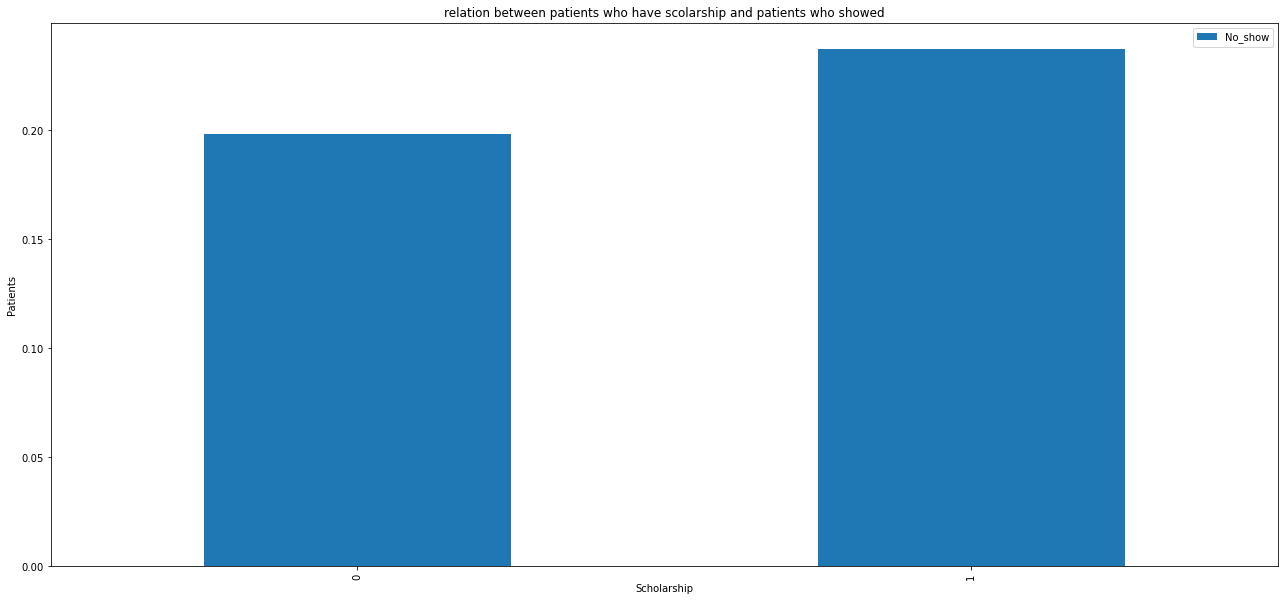

In [26]:
# using group by function to find relations between features
# and then see the relation between people who has scholarship and people who showed up and who didn't

print(df.groupby('Scholarship')['No_show'].value_counts())
print(df.groupby('Scholarship')['No_show'].mean()*100)


df.groupby('Scholarship')['No_show'].mean().plot(kind = 'bar',figsize=(22,10))

plt.xlabel("Scholarship")
plt.ylabel("Patients")
plt.title("relation between patients who have scolarship and patients who showed")
plt.legend()

### Did the not showed patients receive SMS?

SMS_received  No_show
0             0          62510
              1          12535
1             0          25698
              1           9784
Name: No_show, dtype: int64
0    12535
1     9784
Name: SMS_received, dtype: int64


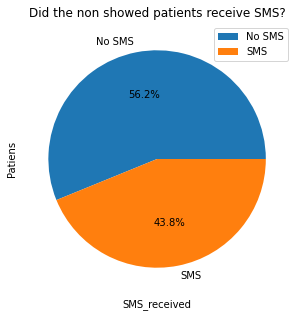

In [27]:
# using group by function to find relations between features
# and then see the relation between people who has scholarship and people who showed up and who didn't

print(df.groupby('SMS_received')['No_show'].value_counts())
print(not_showed['SMS_received'].value_counts())
not_showed['SMS_received'].value_counts().plot(kind = 'pie',figsize=(14,5), autopct='%1.1f%%', labels = ['No SMS','SMS'])
plt.xlabel("SMS_received")
plt.ylabel("Patiens")
plt.title("Did the non showed patients receive SMS?")
plt.legend()

### Relation between Alcoholism & patients who didn't show

Alcoholism
0    20.194649
1    20.148810
Name: No_show, dtype: float64


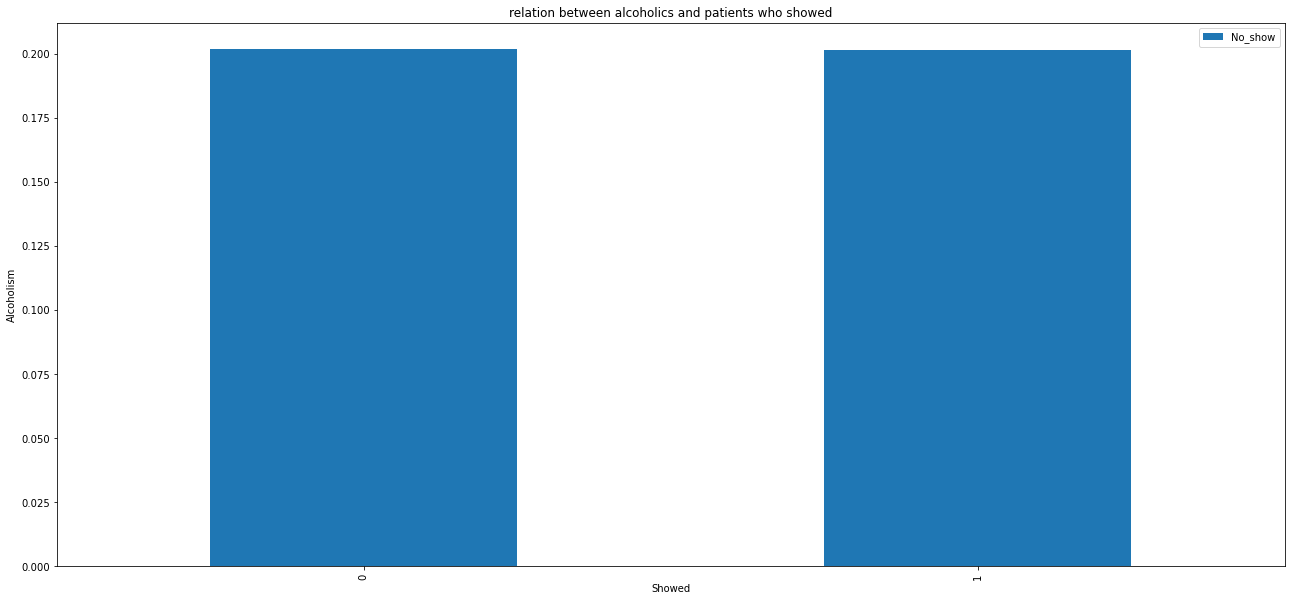

In [28]:
print(df.groupby('Alcoholism')['No_show'].mean()*100)
df.groupby('Alcoholism')['No_show'].mean().plot(kind='bar',figsize=(22,10));
plt.xlabel("Showed")
plt.ylabel("Alcoholism")
plt.title("relation between alcoholics and patients who showed")
plt.legend()

### Relation between Hipertension & patients who didn't show

Hipertension
0    20.903681
1    17.301959
Name: No_show, dtype: float64


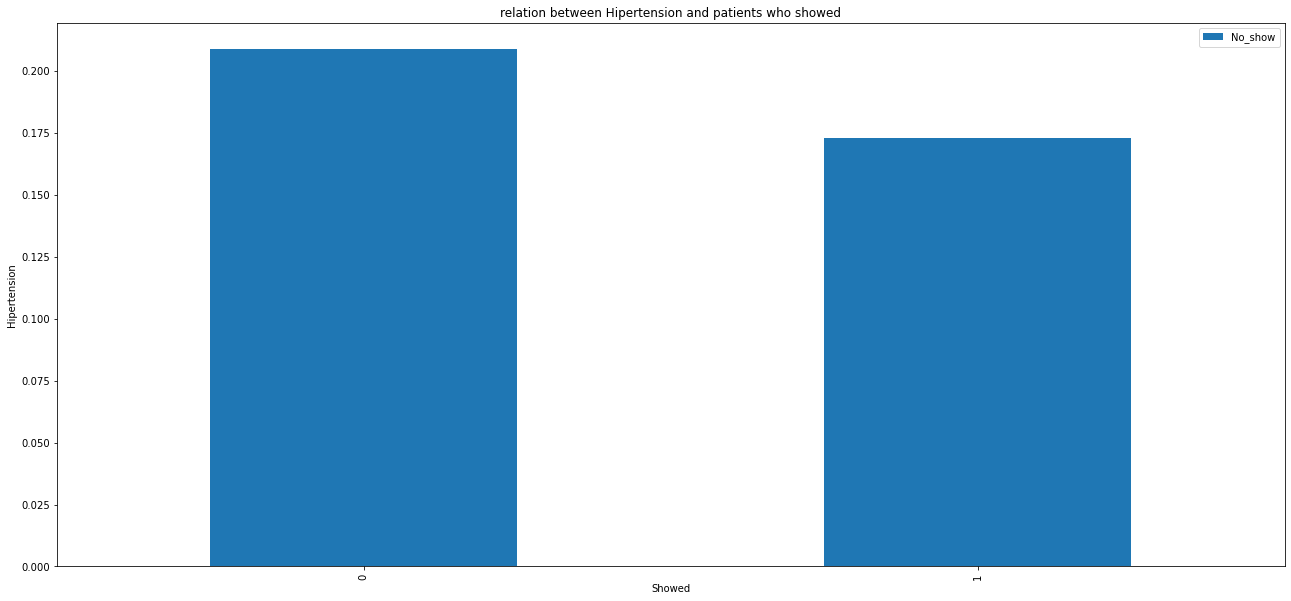

In [29]:
print(df.groupby('Hipertension')['No_show'].mean()*100)
df.groupby('Hipertension')['No_show'].mean().plot(kind='bar',figsize=(22,10));
plt.xlabel("Showed")
plt.ylabel("Hipertension")
plt.title("relation between Hipertension and patients who showed")
plt.legend()

### Relation between Diabetes & patients who didn't show

Diabetes
0    20.362825
1    18.003273
Name: No_show, dtype: float64


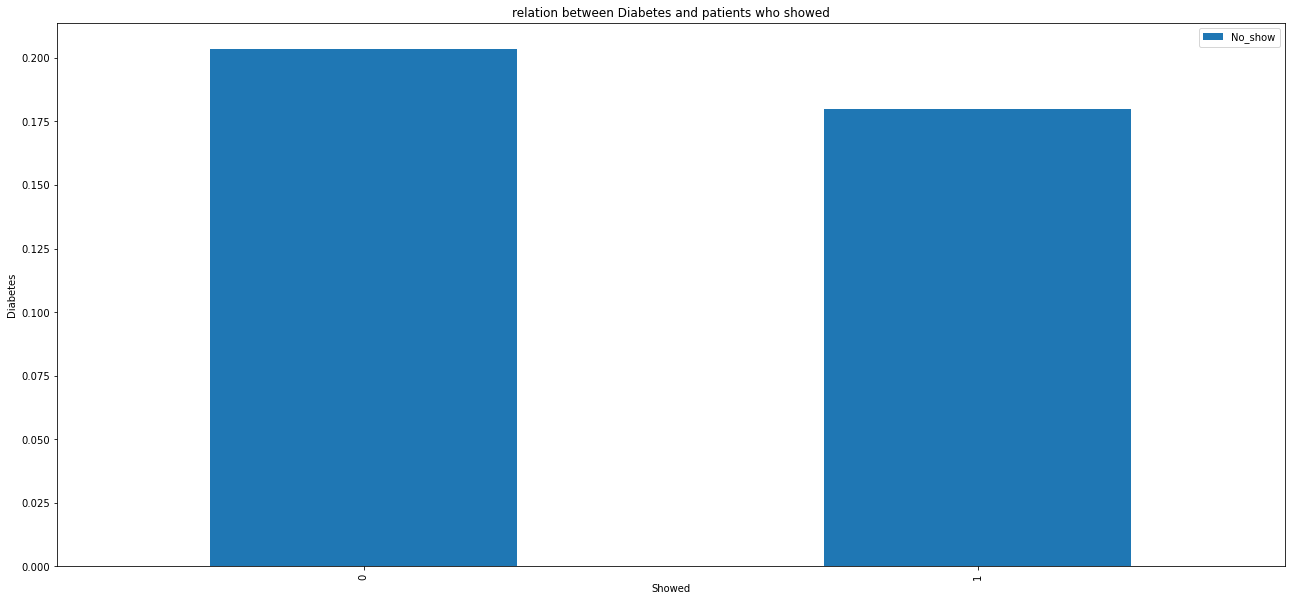

In [30]:
print(df.groupby('Diabetes')['No_show'].mean()*100)
df.groupby('Diabetes')['No_show'].mean().plot(kind='bar',figsize=(22,10));
plt.xlabel("Showed")
plt.ylabel("Diabetes")
plt.title("relation between Diabetes and patients who showed")
plt.legend()

<a id='conclusions'></a>
## Conclusions
### Data conclusion & limitations
> There are some incorrect data as the negative value ages.<br />
> Some schedule dates after the appointment dates which doesn't make any sense.<br />
> The data is limited as it doesn't show if the patient's case is serious or not and if the appointment date was the patient's first choice or they couldn't schedule the needed one.<br />
> The data doesn't show if the patient has booked the appointment with themself or somebody booked it for them.


### Exploratory conclusion
> **No Show**: As we can see 22,319 out of 110,527 patients didn't show on time which makes a 20% of the appointments with no show.<br />
>**Gender**: The Gender is not a good factor of comparison as mostly both males or females have 20% of no show to their appointments.<br />
>**Difference between appointment date and schedule date**: Patients that has near appointment dates from the schedule date are the mostly not showing.<br />
>**Age**: Patients who are most likely to show up on time has average age 39 Years old, and who are most likely to not show up on time has average age 35 years old. <br />
>**Scholarship**: About 24% of the patients that have scholarship didn't show & about 20% of the patients that doesnt have a scholarship had shown. <br />
>**SMS**: 43.8% of the paitents who didn't show on time had received a SMS.<br />
>**Alchoholism**: Alchoholism can't be a factor of comparison as in both cases the percentage of the no show is mostly same 20%. <br />
>**Hipertension & Diabetes**: Has less percentage of show on time.
